In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from SARSA.agent import RandomAgent, SARSAAgent
from SARSA.game import Game
from SARSA.maze import Maze
from SARSA.vizualiser import plot_cumsum, plot_maze, plot_rollav


## Maze gen

In [3]:
maze = Maze((10, 10), 3)

## Visualization

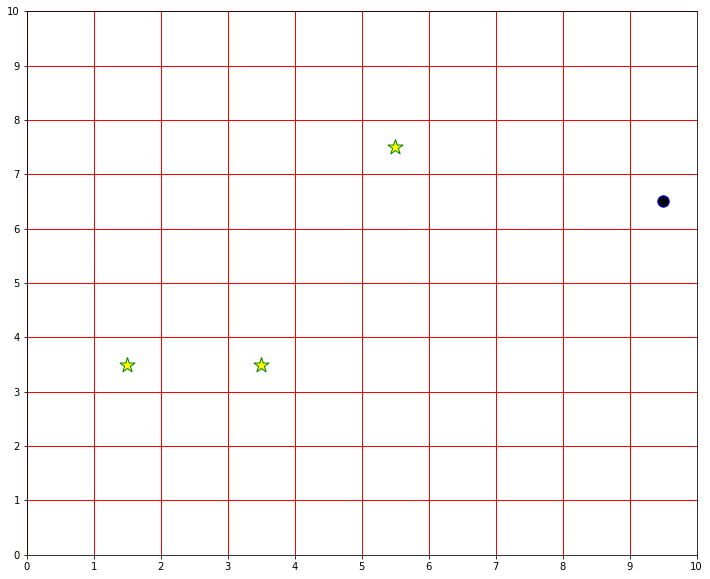

In [4]:
plot_maze(maze)

## Random Agent

In [13]:
game = Game(maze, RandomAgent(maze), max_steps=20)

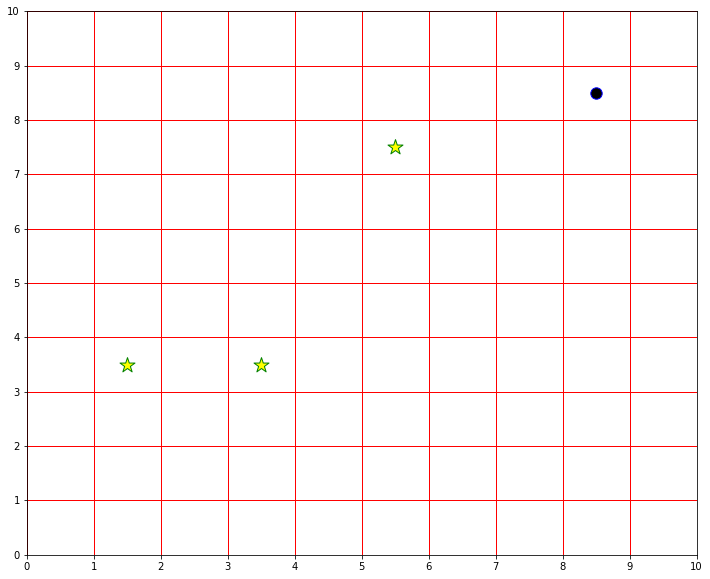

-20

In [14]:
game.run_game(plot=True)

In [15]:
game = Game(maze, RandomAgent(maze), max_steps=20)
game.train_agent(episodes=1000)

episodes: 100%|██████████| 1000/1000 [00:00<00:00, 1313.72it/s]


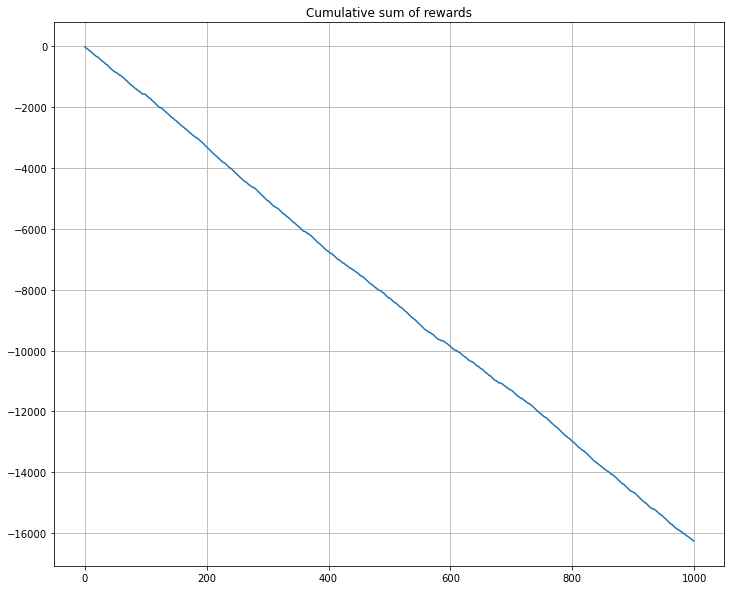

In [16]:
plot_cumsum(game)

## SARSA agent

In [5]:
sarsaaagent = SARSAAgent(maze)

### Train

In [6]:
game = Game(maze, sarsaaagent, max_steps=20)
game.train_agent(episodes=1000)

episodes: 100%|██████████| 1000/1000 [00:01<00:00, 857.05it/s]


### Vizualization

#### Cumulative rewards

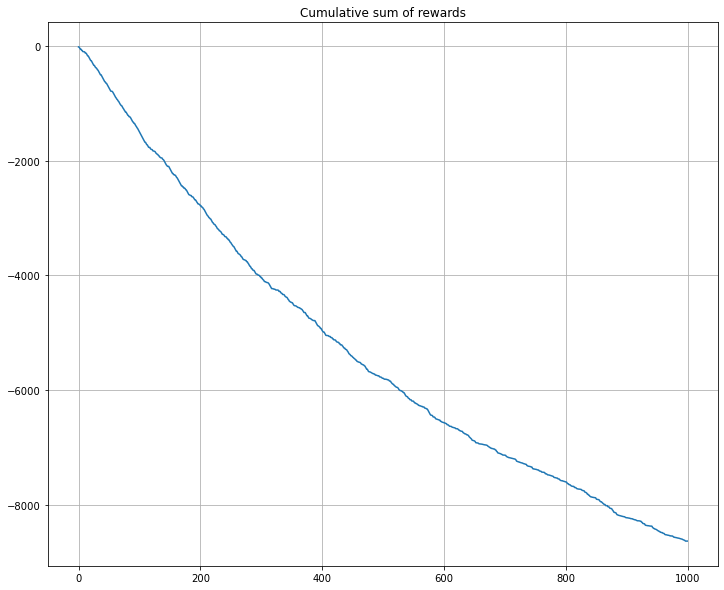

In [7]:
plot_cumsum(game)

#### Q Matrix

In [8]:
sarsaaagent.Q

array([[[  0.        , -11.99205478,   0.        , -12.12254496],
        [-11.33196922,  -9.52906492,   0.        , -11.11609009],
        [ -9.21361569,  -5.82403837,   0.        ,  -8.8737848 ],
        [ -5.52698251,  -7.5688037 ,   0.        ,  -1.965245  ],
        [ -7.20250217,  -9.24268785,   0.        ,  -8.65076205],
        [-10.79126496, -13.27115123,   0.        , -12.96845975],
        [-14.97780536, -16.56714336,   0.        , -14.50797254],
        [-17.16201008, -17.98322819,   0.        , -16.82789731],
        [-17.3142254 , -17.66574718,   0.        , -17.57924848],
        [-18.30491854,   0.        ,   0.        , -16.27531492]],

       [[  0.        , -10.17434619, -12.10427146, -12.57510817],
        [-11.22135668,  -6.10769408, -10.28145595, -10.29241362],
        [ -6.98766263,  -2.30442678,  -8.17375699,  -7.92042851],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [ -3.38538011,  -7.78730914,  -7.69240457,  -9.29458581],
        

#### Rolling average

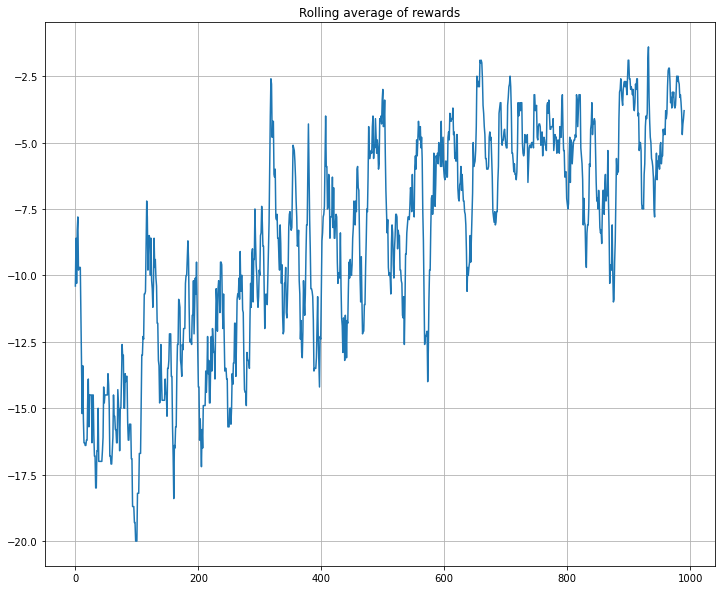

In [9]:
plot_rollav(game, w=10)

#### Sample run

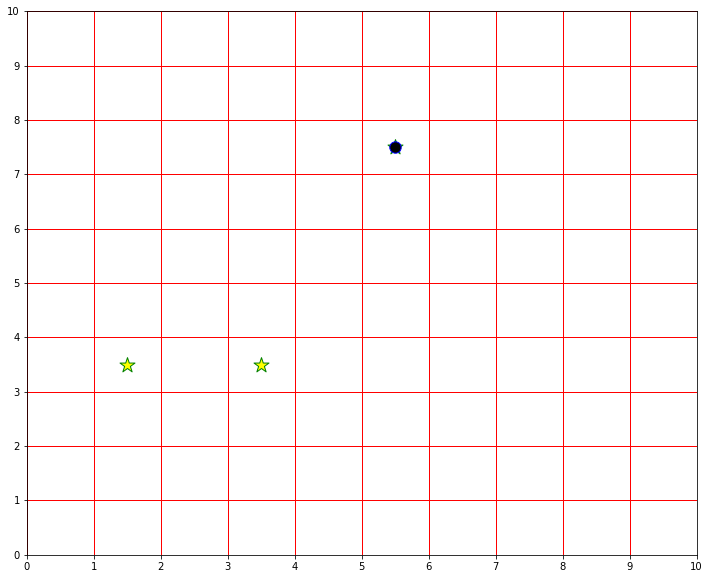

-1

In [12]:
game.run_game(plot=True)